<div style="background-color: #add8e6; padding: 10px; border-radius: 5px; text-align: center">
    <b style="font-size: 24px;">Customer Segmentation (Clustering)</b>
</div>


<div style="text-align: center;">
  <img src="https://img.freepik.com/free-vector/audience-segmentation-abstract-concept-illustration_335657-1854.jpg?w=826&t=st=1706127892~exp=1706128492~hmac=eb48ca957329a7b70106212e08e0edc45afa9658290f9af82b91fbd3d8893661" alt="image" width="500"/>
</div>


<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Problem Statement</b></i>
</div>


***Customer Personality Analysis*** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

<div style="text-align: center;">
  <img src="https://blog.intercomassets.com/blog/wp-content/uploads/2020/10/Customer-segmentation-performance-matrix.png" alt="image" width="800"/>
</div>


<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Dataset Features</b></i>
</div>

**People:**

- *ID:* Customer's unique identifier
- *Year_Birth:* Customer's birth year
- *Education:* Customer's education level
- *Marital_Status:* Customer's marital status
- *Income:* Customer's yearly household income
- *Kidhome:* Number of children in customer's household
- *Teenhome:* Number of teenagers in customer's household
- *Dt_Customer:* Date of customer's enrollment with the company
- *Recency:* Number of days since customer's last purchase
- *Complain:* 1 if the customer complained in the last 2 years, 0 otherwise

**Products:**

- *MntWines:* Amount spent on wine in last 2 years
- *MntFruits:* Amount spent on fruits in last 2 years
- *MntMeatProducts:* Amount spent on meat in last 2 years
- *MntFishProducts:* Amount spent on fish in last 2 years
- *MntSweetProducts:* Amount spent on sweets in last 2 years
- *MntGoldProds:* Amount spent on gold in last 2 years

**Promotion:**

- *NumDealsPurchases:* Number of purchases made with a discount
- *AcceptedCmp1:* 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- *AcceptedCmp2:* 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- *AcceptedCmp3:* 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- *AcceptedCmp4:* 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- *AcceptedCmp5:* 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- *Response:* 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place:**

- *NumWebPurchases:* Number of purchases made through the company’s website
- *NumCatalogPurchases:* Number of purchases made using a catalogue
- *NumStorePurchases:* Number of purchases made directly in stores
- *NumWebVisitsMonth:* Number of visits to company’s website in the last month

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Import Libraries and Data</b></i>
</div>

In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# evaluations
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/marketing_campaign.csv', sep="\t")

<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Handling Missing Data</b></i>
</div>

*Let's identify whether there are any missing values in the dataset.*

In [3]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

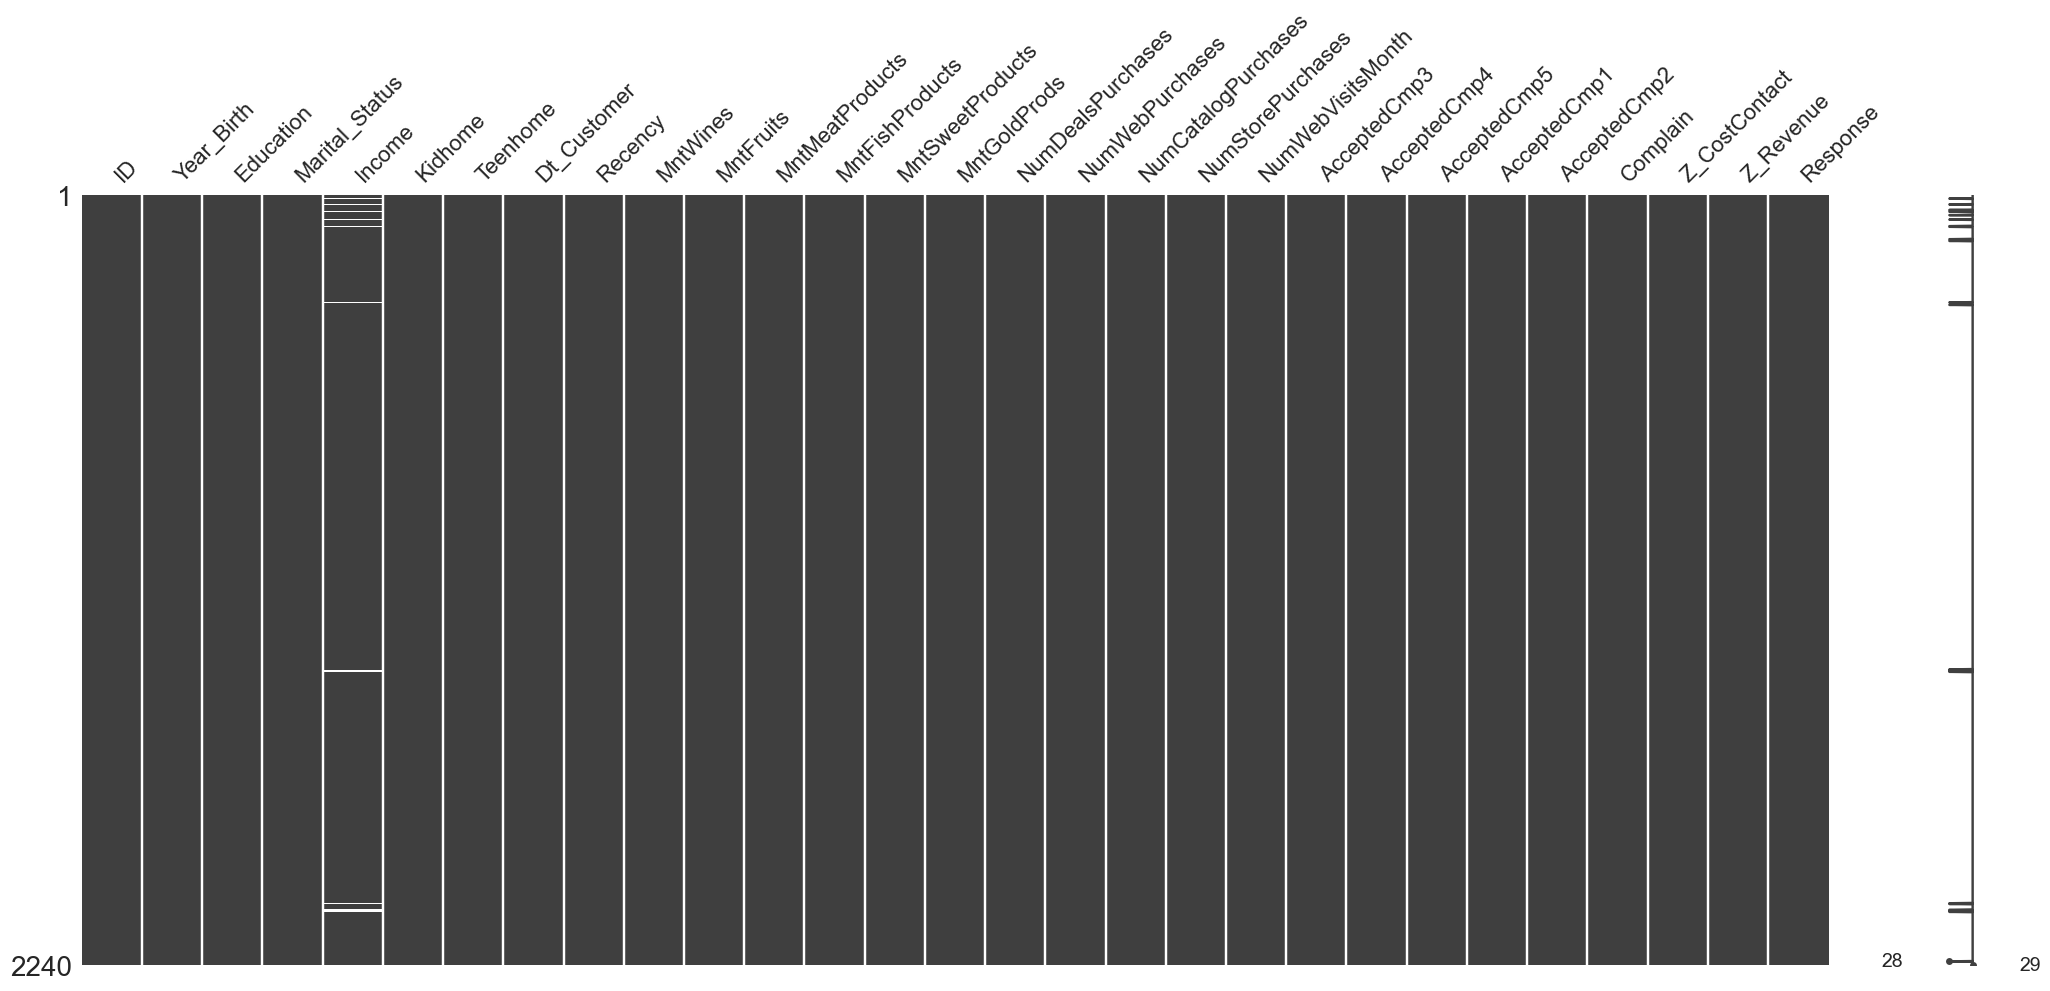

In [4]:
msno.matrix(data);

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

*Let's see if we have any duplicate rows.*

In [7]:
data.duplicated().sum()

0

<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Feature Engineering</b></i>
</div>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

<code style="background: #add8e6;color:black">Dt_Customer, the column indicating the date a customer joined the database, is currently not parsed as DateTime.</code>

In [9]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [10]:
print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


<code style="background: #add8e6;color:black">Calculate the customer's age based on the birth year provided in the 'Year_Birth' column.</code>

In [11]:
data['age'] = 2024 - data['Year_Birth']

<code style="background: #add8e6;color:black">Generate a new feature called 'Spent,' representing the total amount spent by the customer across various categories over a two-year period.</code>

In [12]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

<code style="background: #add8e6;color:black">Form a new feature named 'Living_With' based on the 'Marital_Status' column to identify the living situation.</code>

In [13]:
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

<code style="background: #add8e6;color:black">Create a 'Children' feature to show the total number of kids and teenagers in a household.</code>

In [14]:
data['Children'] = data['Kidhome'] + data['Teenhome']

<code style="background: #add8e6;color:black">For a better understanding of households, create a feature indicating 'Family_Size'.</code>

In [15]:
data['Family_Size'] = data['Living_With'].replace({'Alone' : 1, 'Partner' : 2}) + data['Children']

<code style="background: #add8e6;color:black">Create a 'Is_Parent' feature to indicate the parenthood status.</code>

In [16]:
data['Is_Parent']  = np.where(data.Children > 0, 1, 0)

<code style="background: #add8e6;color:black">Group education levels into three segments.</code>

In [17]:
data['Education']  = data['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


<code style="background: #add8e6;color:black">For better understanding.</code>

In [18]:
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

<code style="background: #add8e6;color:black">Removing redundant features.</code>

In [19]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

**At this stage,**
- We are creating two new features.
- We are categorizing the data into three distinct groups, allowing for a more detailed examination of examples in different segments.
- By identifying and removing outliers or unnecessary values, we are making our dataset cleaner and more reliable.

In [20]:
data.head(5)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,70,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,59,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,40,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,43,422,Partner,1,3,1


In [21]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,3.000000,5.000000,1.000000


<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Data Analysis and Visualization</b></i>
</div>

In [22]:
data.shape

(2216, 29)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [24]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,3.000000,5.000000,1.000000


In [25]:
data.describe(include=object).T

,count,unique,top,freq
Education,2216,3,Graduate,1116
Living_With,2216,2,Partner,1430


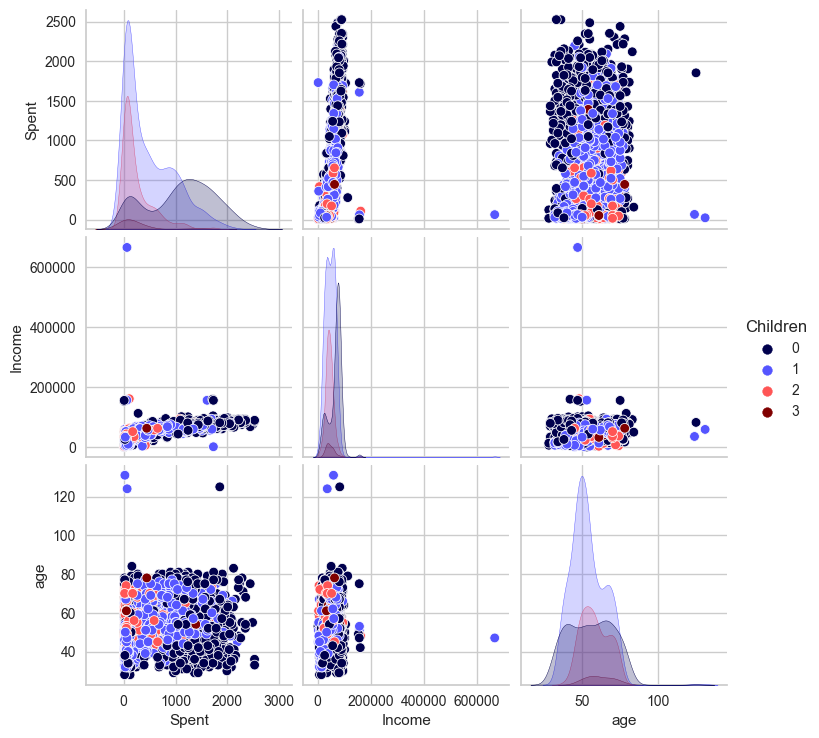

In [26]:
sns.pairplot(data, vars=['Spent', 'Income', 'age'], hue = 'Children', palette='seismic');

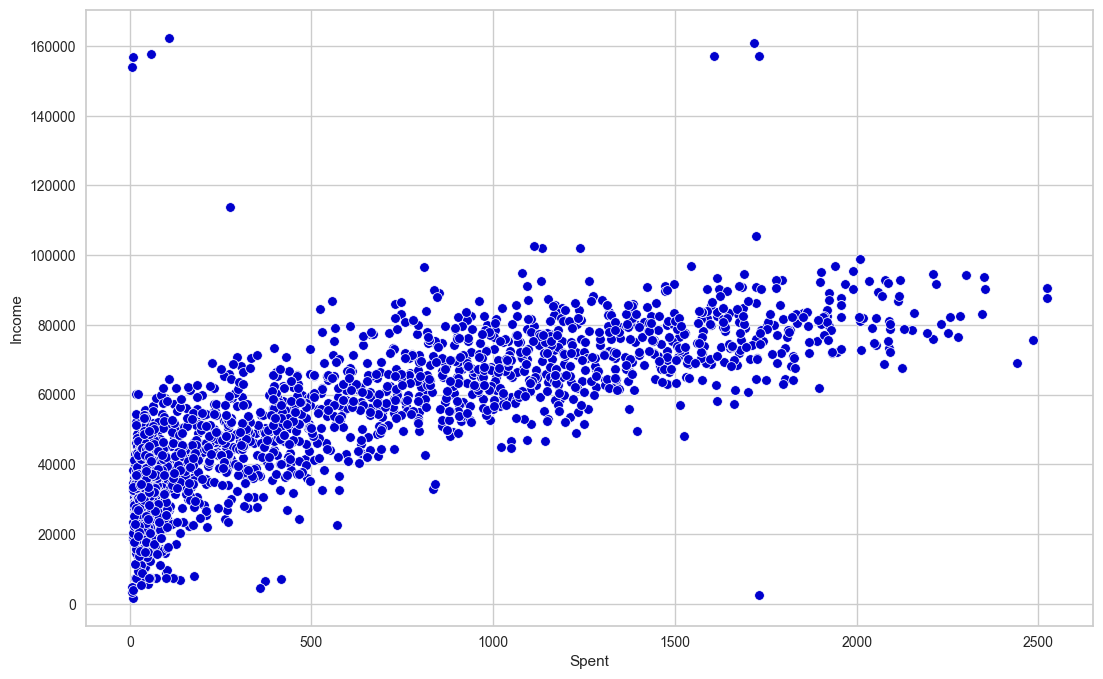

In [27]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#0000CD');

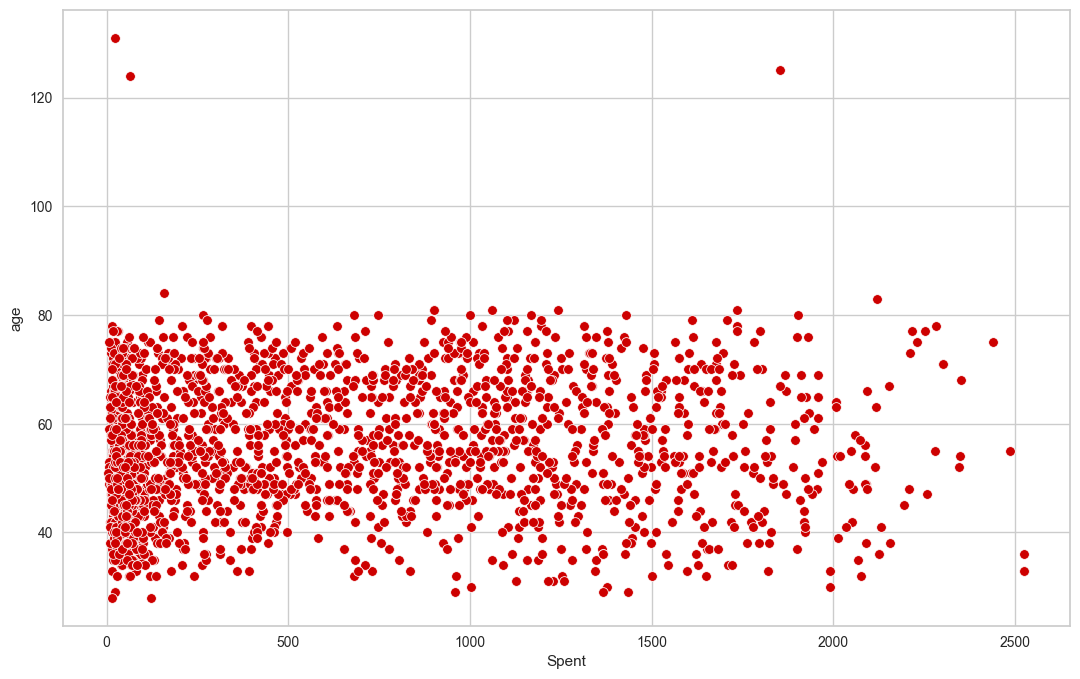

In [28]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['age'], color='#CD0000');

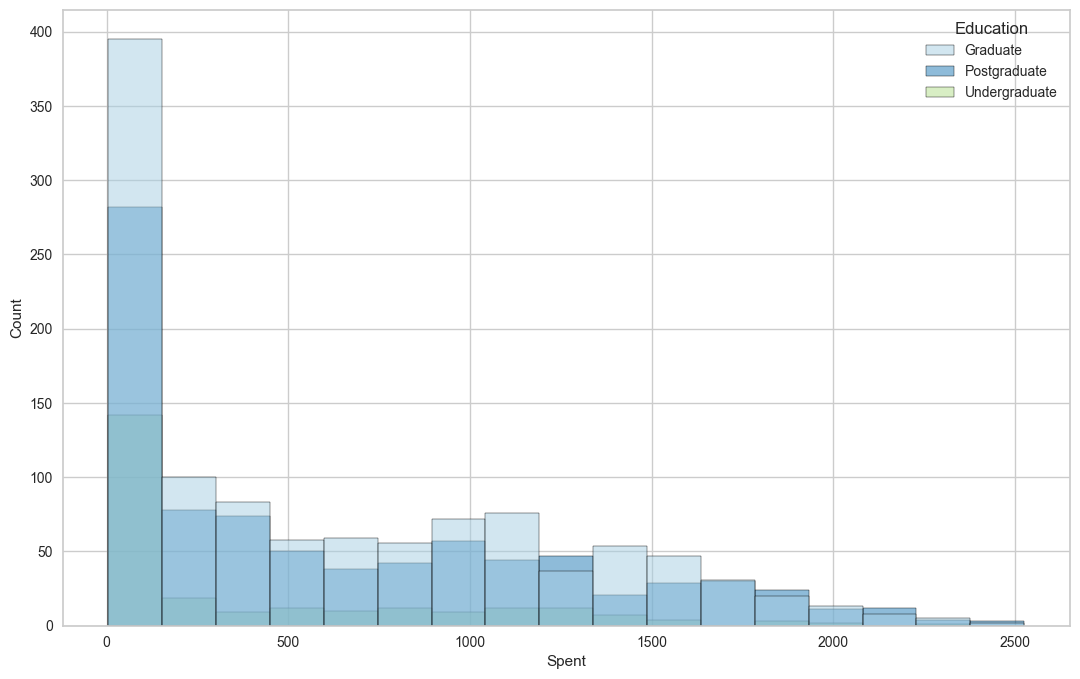

In [29]:
plt.figure(figsize=(13,8))
sns.histplot(x = data['Spent'], hue = data['Education'], palette='Paired');

<Axes: ylabel='count'>

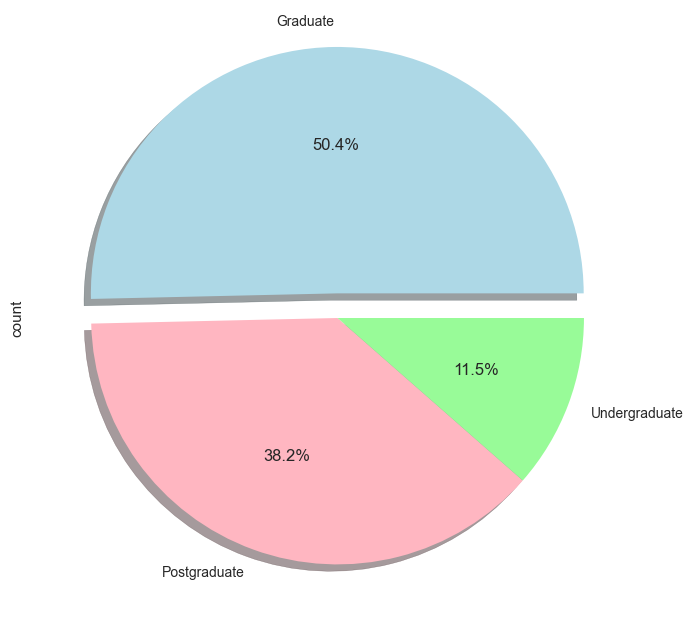

In [30]:
data['Education'].value_counts().plot.pie(explode=[0.1, 0, 0], autopct='%1.1f%%', shadow=True, figsize=(8, 8), colors=['#add8e6', '#ffb6c1', '#98fb98', '#e74c3c'])


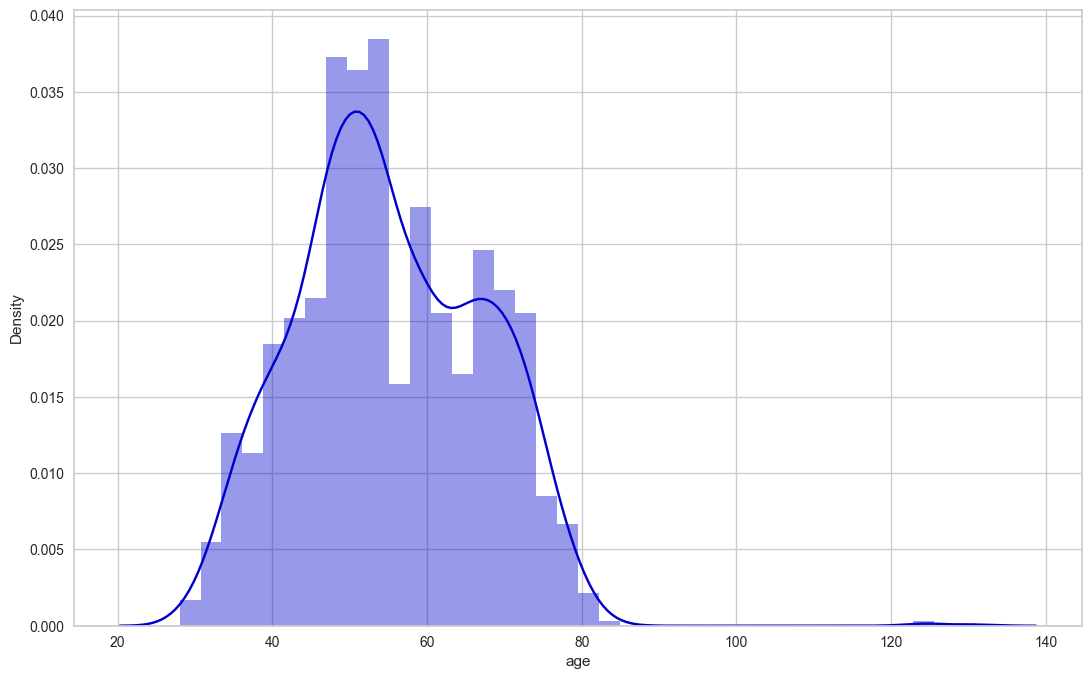

In [31]:
plt.figure(figsize=(13,8))
sns.distplot(data.age, color='#0000CD');

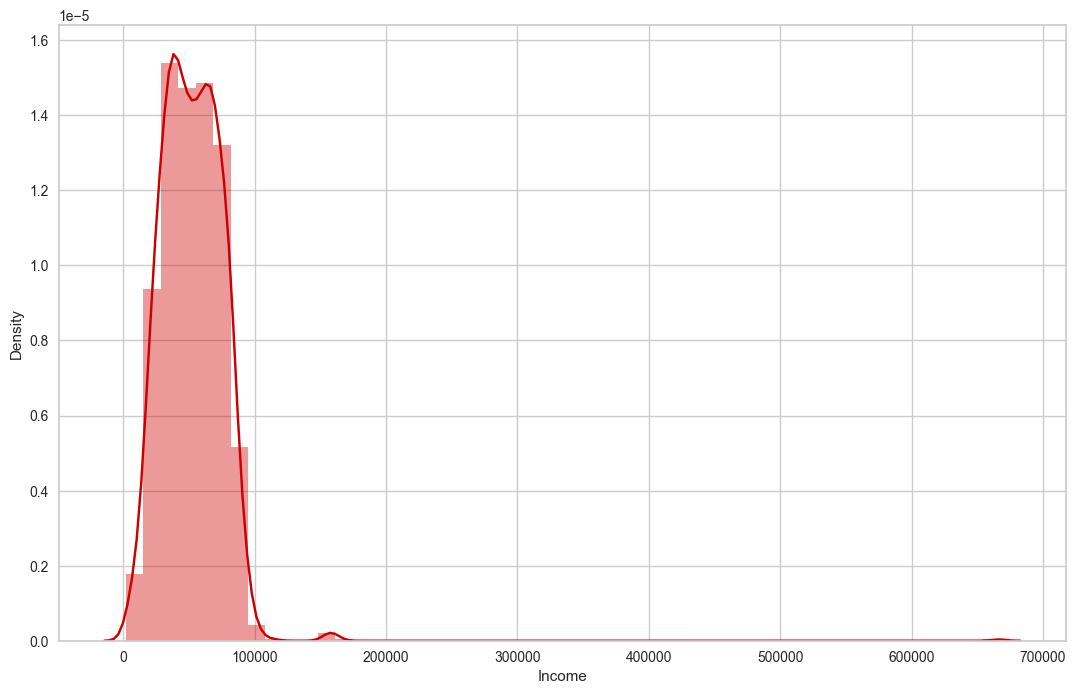

In [32]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='#CD0000');

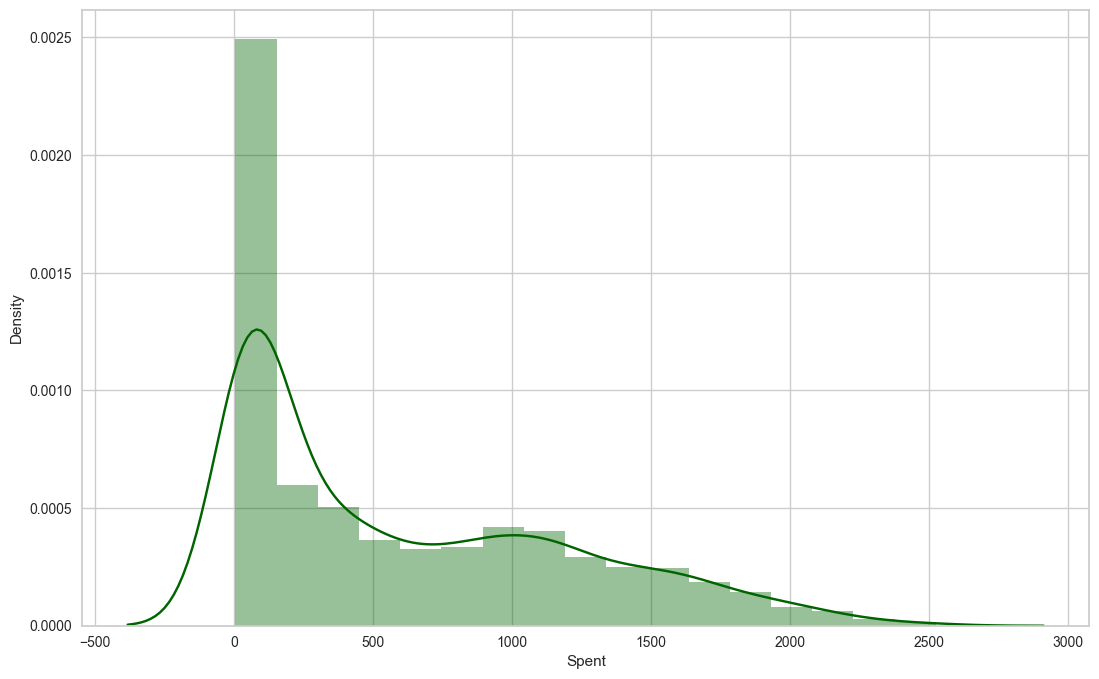

In [33]:
plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='#006400');

<Axes: >

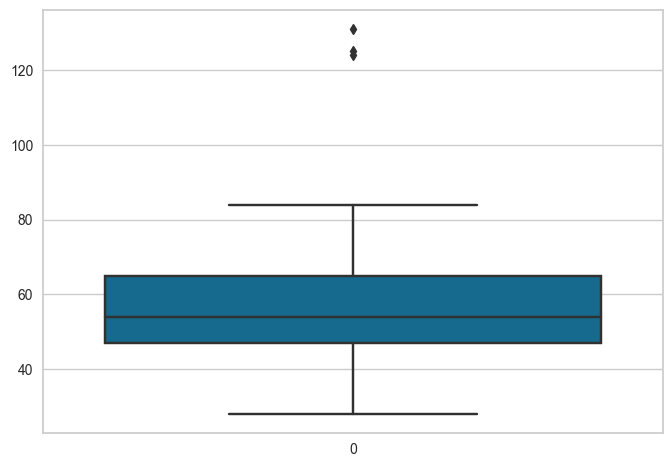

In [34]:
sns.boxplot(data['age'])

<Axes: >

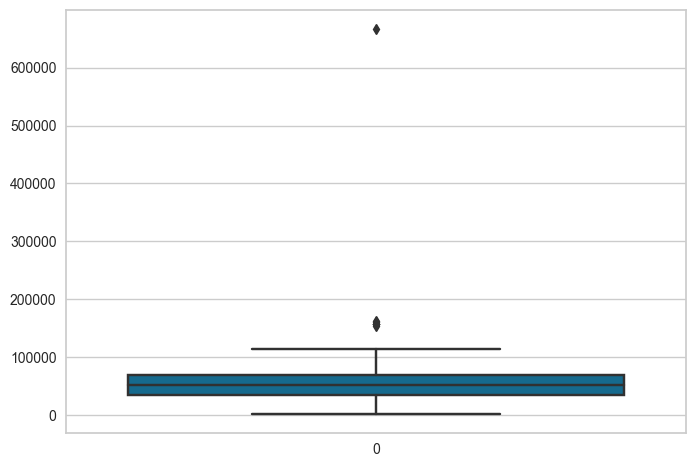

In [35]:
sns.boxplot(data['Income'])

<Axes: >

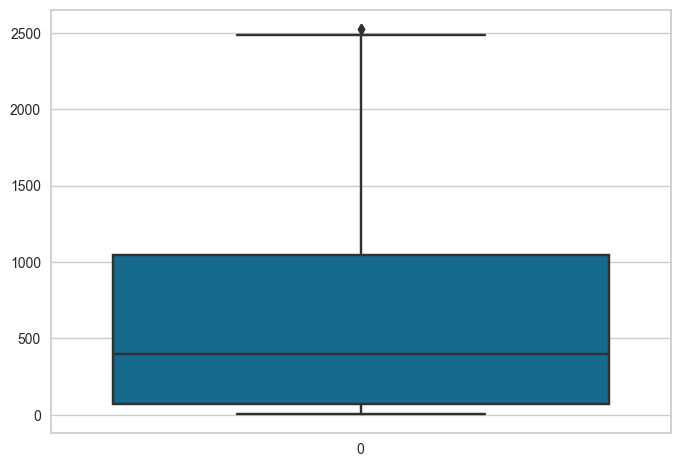

In [36]:
sns.boxplot(data['Spent'])

In [37]:
data.head(1)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,67,1617,Alone,0,1,0


In [38]:
numerical = ['Income', 'Recency', 'age', 'Spent']

In [39]:
def detect_outliers(d):
    for i in d:
        Q3, Q1 = np.percentile(data[i], [75,25])
        IQR = Q3 - Q1

        ul = Q3 + 1.5*IQR
        ll = Q1 - 1.5*IQR

        outliers = data[i][(data[i] > ul) | (data[i] < 11)]
        print(f'*** {i} Outlier Points***', '\n', outliers, '\n')

In [40]:
detect_outliers(numerical)

*** Income Outlier Points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency Outlier Points*** 
 23      0
26      4
33      8
34      4
40      3
       ..
2201    0
2202    3
2222    7
2229    9
2238    8
Name: Recency, Length: 258, dtype: int64 

*** age Outlier Points*** 
 192    124
239    131
339    125
Name: age, dtype: int64 

*** Spent Outlier Points*** 
 178       10
422       10
655        6
867       10
981        6
1179    2525
1245       8
1248      10
1420       8
1492    2524
1524       5
1572    2525
1683      10
1819       9
1846       9
2129       8
2132       8
Name: Spent, dtype: int64 



<code style="background: #add8e6;color:black">We will remove some of the outlier points.</code>

In [41]:
data.shape

(2216, 29)

In [42]:
data = data[(data['age'] < 100)]
data = data[(data['Income'] < 600000)]

In [43]:
data.shape

(2212, 29)

<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Rare Categories</b></i>
</div>

**While some categories are quite common in the dataset, others appear only in a limited number of samples**

- Categorical variables containing infrequent values can lead to overfitting problems, especially in tree-based algorithms.
- There may be cases where rare labels are present in the training set but not in the testing set, potentially resulting in over-fitting to the training data.
- On the other hand, rare labels may appear in the testing set but not in the training set, leaving the machine learning model unclear on how to handle them.

In [44]:
categorical = [var for var in data.columns if data[var].dtype=='O']

<code style="background: #F3F5D8;color:black">Checks whether the data type of a column is object. If the column's data type is object, this column is considered a categorical variable and is added to the categorical list.</code>

In [45]:
# check the number of different labels
for var in categorical:
    print(data[var].value_counts() / float(len(data)))
    print()
    print()


Education
Graduate         0.504069
Postgraduate     0.382007
Undergraduate    0.113924
Name: count, dtype: float64


Living_With
Partner    0.64557
Alone      0.35443
Name: count, dtype: float64




<code style="background: #add8e6;color:black">This means that there are no rare categories in categorical variables.</code>

<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Categorical Variables Transformation</b></i>
</div>

In [46]:
categorical

['Education', 'Living_With']

In [47]:
data['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

In [48]:
data['Living_With'] = data['Living_With'].map({'Alone' : 0, 'Partner' : 1})

In [49]:
data['Education'] = data['Education'].map({'Undergraduate' : 0, 'Graduate' : 1, 'Postgraduate' : 2})

In [50]:
data.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
age                      int64
Spent                    int64
Living_With              int64
Children                 int64
Family_Size              int64
Is_Parent                int64
dtype: object

In [51]:
data.head(5)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,67,1617,0,0,1,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,70,27,0,2,3,1
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,59,776,1,0,2,0
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,40,53,1,1,3,1
4,2,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,43,422,1,1,3,1


<Axes: >

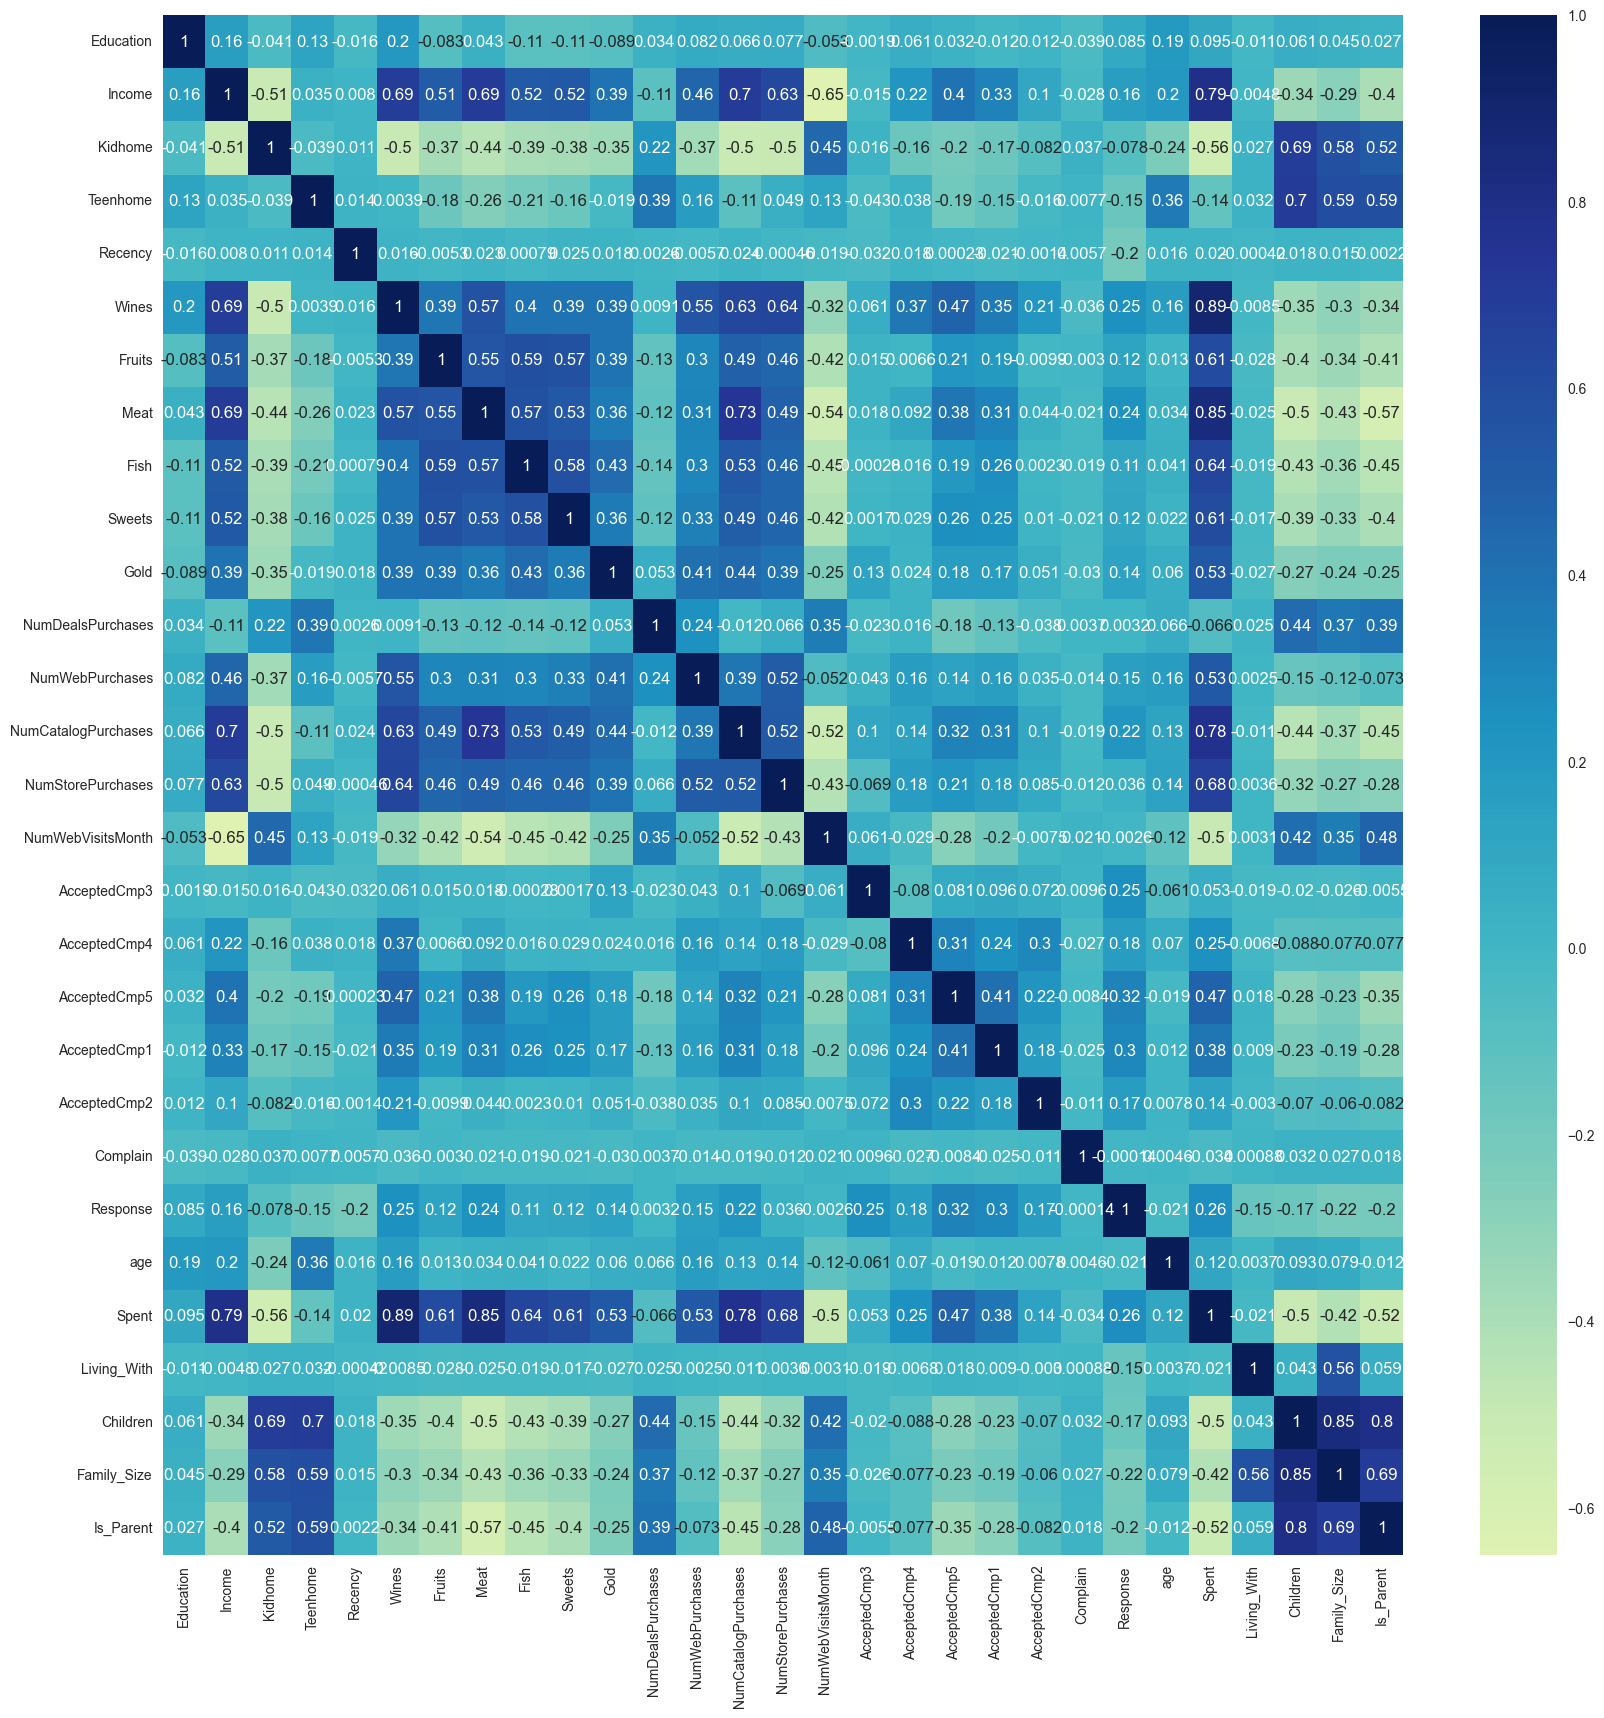

In [52]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot = True, cmap = 'YlGnBu', center = 0)

<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Feature Scalling</b></i>
</div>

*StandardScaler*
$$ z = \frac{x - \text{mean}(X)}{\text{std}(X)} $$


In [53]:
#Creating a copy of data
data_old = data.copy()

In [54]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis = 1)

In [55]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

data.head(5)

<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Dimensionality Reduction</b></i>
</div>

The higher the number of features, the more challenging it is to work with. Many of these features are correlated and, therefore, unnecessary. So, a dimensionality reduction process can be applied to the selected features before passing them through a classifier.

*Dimensionality reduction* is the process of decreasing the considered number of random variables, resulting in a set of principal variables.

*Principal Component Analysis (PCA)* is a technique used to reduce the dimensionality of such datasets.

In [56]:
# Initiating PCA to reduce features to 3
p = PCA(n_components=3)
p.fit(data)

PCA(n_components=3)

In [57]:
pca_ds = p.components_.T
pca_ds

array([[ 1.13472540e-02,  1.40729722e-01, -5.06792371e-01],
       [ 2.79487144e-01,  1.78228388e-01, -7.54055011e-02],
       [-2.46222655e-01,  5.22077018e-03,  2.82685318e-01],
       [-9.87088842e-02,  4.62106846e-01, -1.51323119e-01],
       [ 3.52656996e-03,  1.62581475e-02,  3.59194276e-02],
       [ 2.55717051e-01,  2.09384718e-01, -1.16832923e-01],
       [ 2.38397705e-01,  1.10588041e-02,  2.54600428e-01],
       [ 2.85462016e-01,  9.91397957e-03,  7.66743570e-02],
       [ 2.48709740e-01,  2.53877841e-04,  2.54003974e-01],
       [ 2.37301875e-01,  2.16388970e-02,  2.57377847e-01],
       [ 1.88380419e-01,  1.23087600e-01,  1.99299056e-01],
       [-7.82600387e-02,  3.48731658e-01,  1.52274237e-01],
       [ 1.67559869e-01,  2.96775679e-01,  2.29844439e-02],
       [ 2.77349115e-01,  1.05970593e-01,  1.70007367e-02],
       [ 2.41542917e-01,  2.05472711e-01, -7.80054723e-03],
       [-2.25949583e-01,  4.61068412e-02,  9.13329784e-02],
       [ 3.84647411e-02,  2.34781211e-01

In [58]:
pd.DataFrame(pca_ds, index=data.columns, columns=['R1','R2','R3'])

,R1,R2,R3
Education,0.011347,0.140730,-0.506792
Income,0.279487,0.178228,-0.075406
Kidhome,-0.246223,0.005221,0.282685
Teenhome,-0.098709,0.462107,-0.151323
Recency,0.003527,0.016258,0.035919
Wines,0.255717,0.209385,-0.116833
Fruits,0.238398,0.011059,0.254600
Meat,0.285462,0.009914,0.076674
Fish,0.248710,0.000254,0.254004
Sweets,0.237302,0.021639,0.257378


In [59]:
# This attribute contains the variance explained by each principal component.
p.explained_variance_

array([8.27465625, 2.92091449, 1.43060456])

In [60]:
p.explained_variance_ratio_

array([0.3759507 , 0.13270882, 0.06499808])

In [61]:
p.explained_variance_ratio_.cumsum()

array([0.3759507 , 0.50865952, 0.5736576 ])

Text(0, 0.5, 'Lambda i')

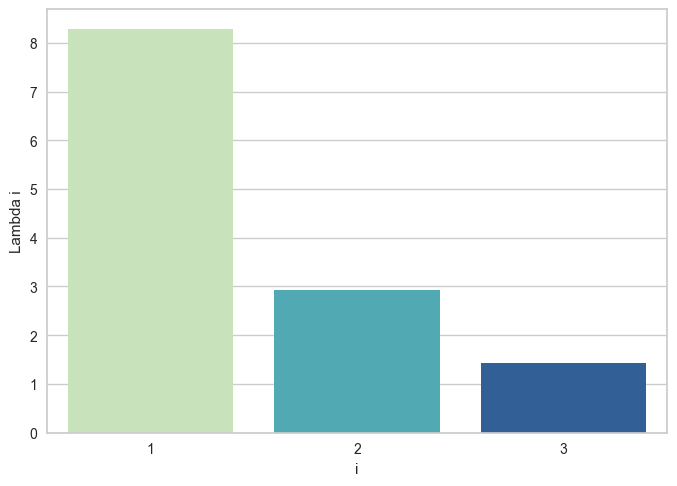

In [62]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'YlGnBu')
plt.xlabel('i')
plt.ylabel('Lambda i')

In [63]:
data_pca = pd.DataFrame(p.transform(data), columns = (['Col1','Col2','Col3']))

In [64]:
data_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
Col1,2212.0,-1.606109e-16,2.876570,-5.915031,-2.548037,-0.784932,2.418554,7.441146
Col2,2212.0,-4.497106e-17,1.709068,-4.398464,-1.343410,-0.133306,1.243040,6.248150
Col3,2212.0,-1.124276e-17,1.196080,-3.543151,-0.864624,-0.015181,0.824583,5.034539


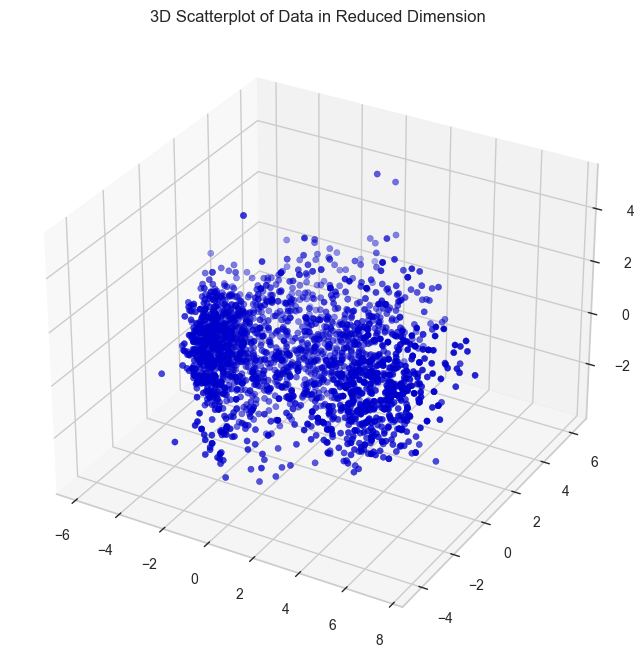

In [65]:
x = data_pca['Col1']
y = data_pca['Col2']
z = data_pca['Col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x,y,z, c = '#0000CD', marker='o')
ax.set_title('3D Scatterplot of Data in Reduced Dimension')
plt.show()

<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Clustering</b></i>
</div>

* Now that the features have been reduced to three dimensions, I will perform clustering using Agglomerative Clustering. Agglomerative clustering is a hierarchical clustering method that involves merging examples until the desired number of clusters is reached.

<code style="background: #add8e6;color:black">Elbow Method to determine the number of clusters to be formed</code>

 Elbow Method to determine the number of clusters to be formed:


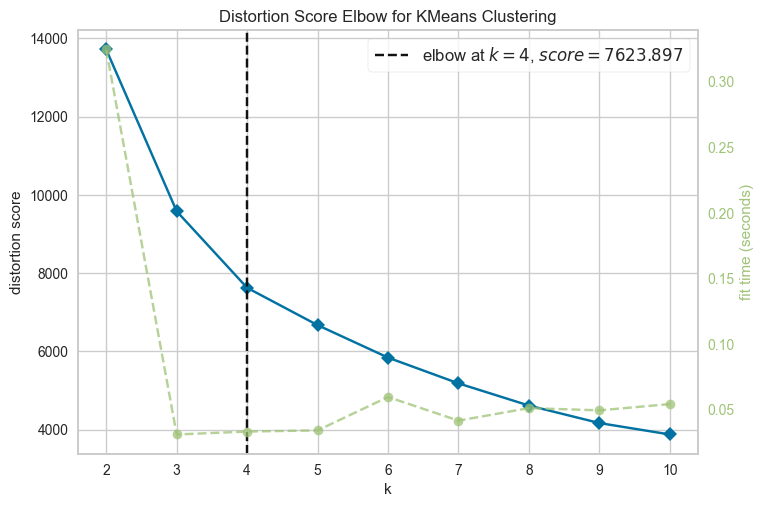

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
print(' Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(data_pca)
Elbow_M.show()

<code style="background: #add8e6;color:black">This means that four will be an optimal number of clusters for this data.</code>
<code style="background: #add8e6;color:black">Next, Agglomerative Clustering Model.</code>

In [67]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_pca)
data_pca['Clusters'] = yhat_AC
# Adding the Clusters feature to the original dataframe.
data["Clusters"] = yhat_AC
data_old["Clusters"] = yhat_AC

<code style="background: #add8e6;color:black">3-D distribution of the clusters.</code>


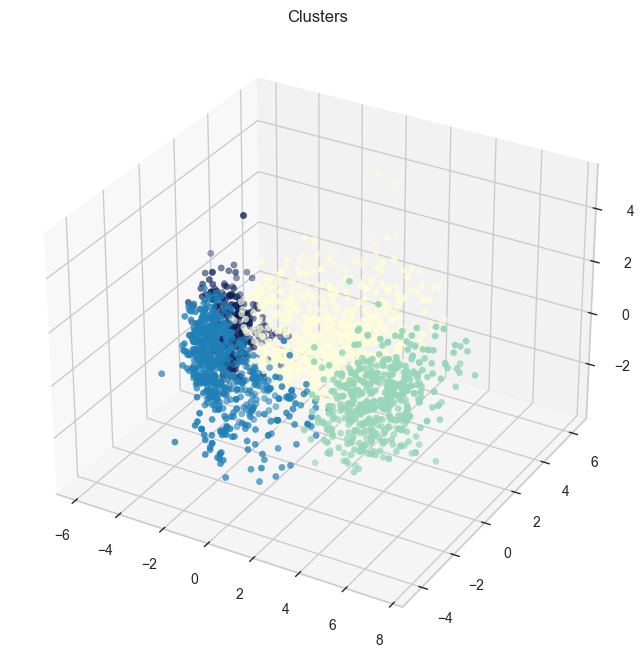

In [68]:
fig = plt.figure(figsize=(13,8))

ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x,y,z, c=data_pca['Clusters'], marker = 'o', cmap='YlGnBu')
ax.set_title('Clusters')
plt.show()

<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Cluster Analysis</b></i>
</div>

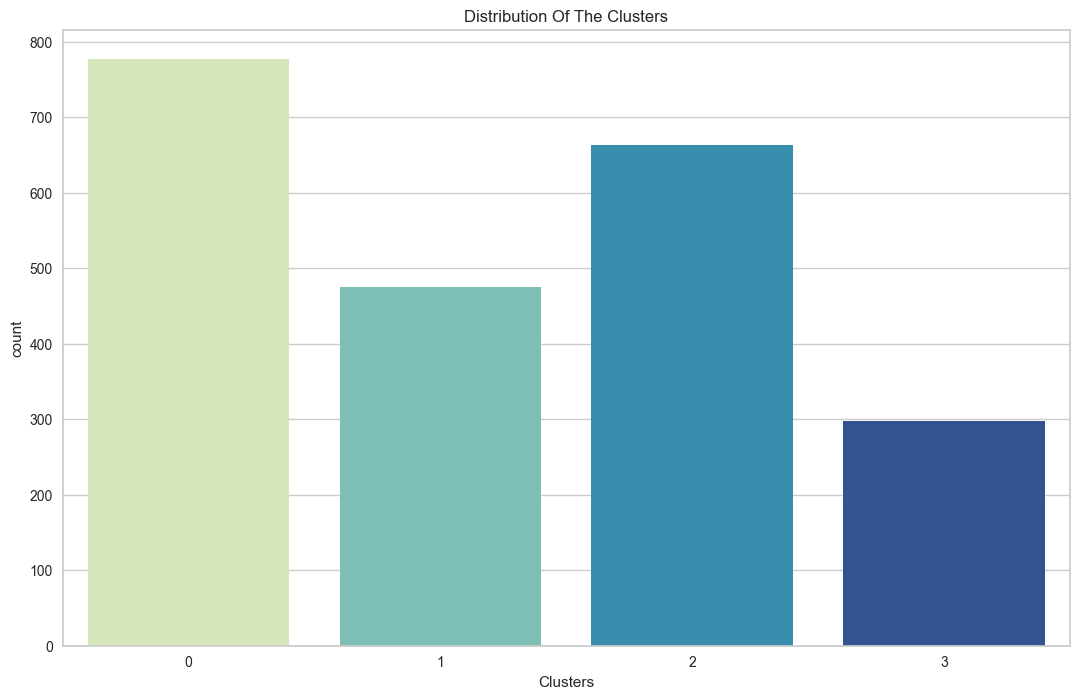

In [69]:
plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Clusters'], palette='YlGnBu')
pl.set_title('Distribution Of The Clusters')
plt.show()

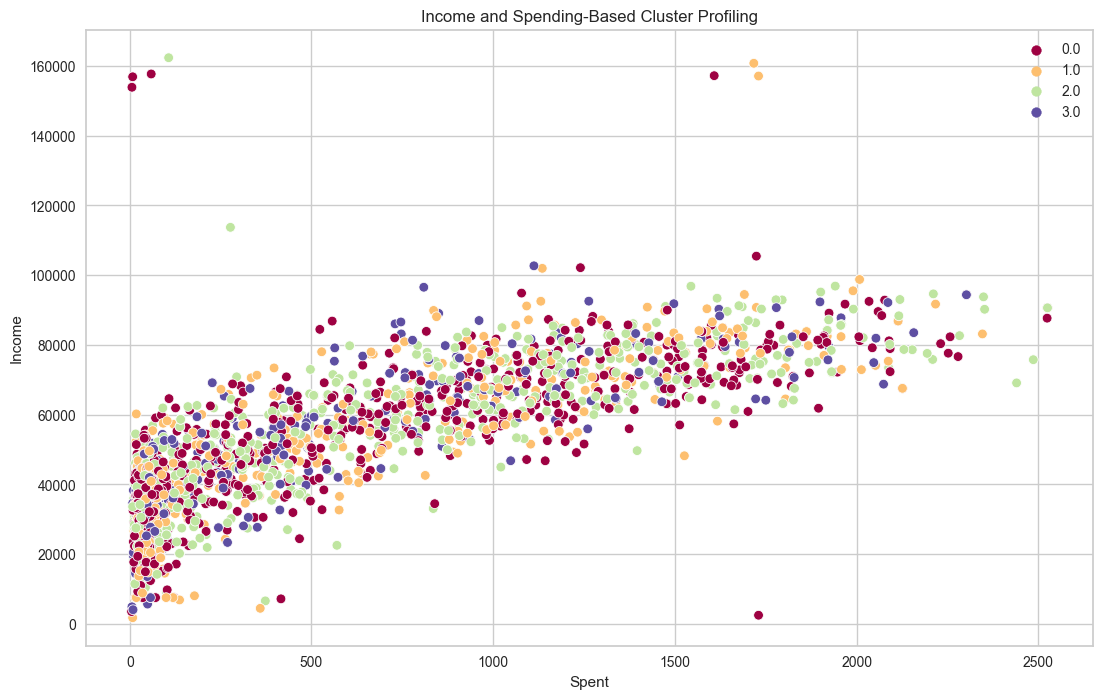

In [70]:
plt.figure(figsize=(13,8))

pl = sns.scatterplot(data = data_old, x=data_old['Spent'], y = data_old['Income'], hue = data_pca['Clusters'], palette='Spectral')
pl.set_title("Income and Spending-Based Cluster Profiling")
plt.legend();

<code style="background: #add8e6; color: black">
Income vs Spending plot illustrates the clustering pattern:
<ul>
  <li>Cluster 0: High spending & average income</li>
  <li>Cluster 1: High spending & high income</li>
  <li>Cluster 2: Low spending & low income</li>
  <li>Cluster 3: High spending & low income</li>
</ul>
</code>


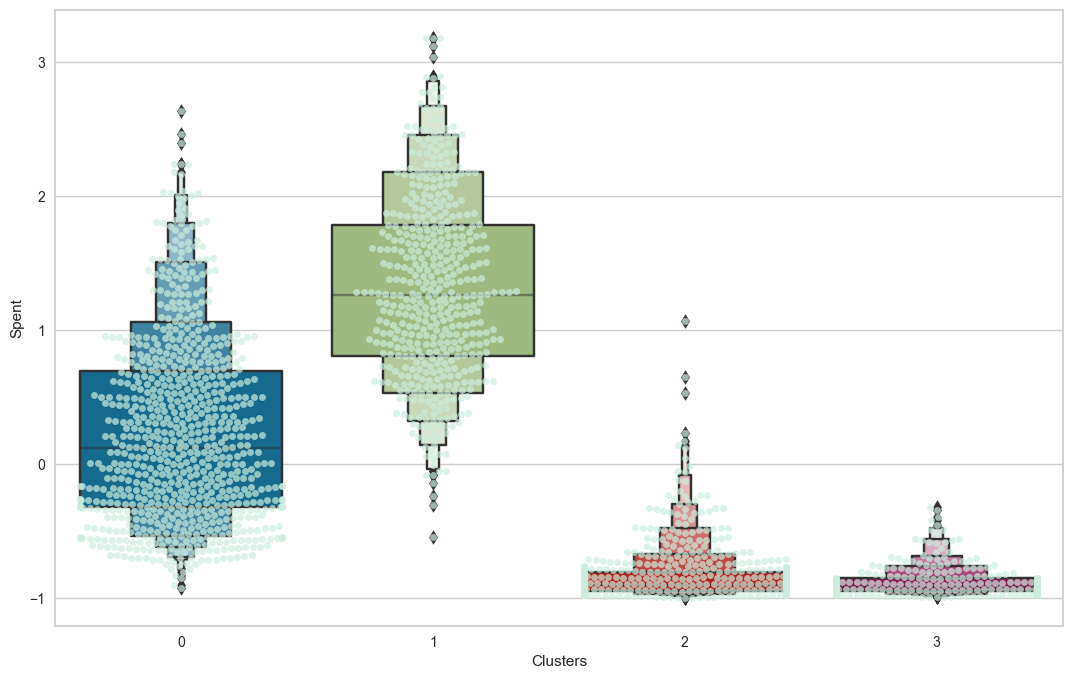

In [71]:
plt.figure(figsize=(13,8))
pl = sns.swarmplot(x = data['Clusters'], y=data['Spent'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x = data['Clusters'], y=data['Spent'])
plt.show();

<code style="background: #add8e6;color:black">From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.</code>

<code style="background: #add8e6;color:black">Next exploring how did our campaigns do in the past.</code>

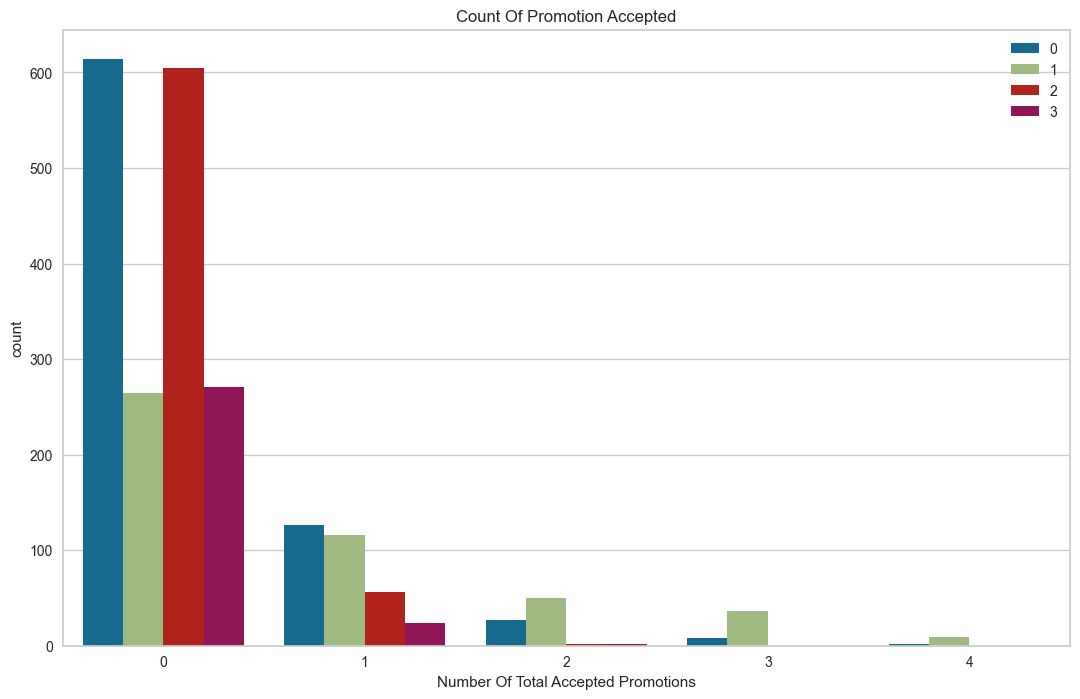

In [72]:
#Creating a feature to get a sum of accepted promotions 
data_old['Total_Promos'] = data_old['AcceptedCmp1'] + data_old['AcceptedCmp2'] + data_old['AcceptedCmp3'] + data_old['AcceptedCmp4'] + data_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=data_old['Total_Promos'], hue=data_old['Clusters'])
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

<code style="background: #add8e6;color:black">There is not a significant response to the campaigns. Overall, there is very little participation. Nobody is taking for all five. There may be a need for better-targeted and better-planned campaigns.</code>

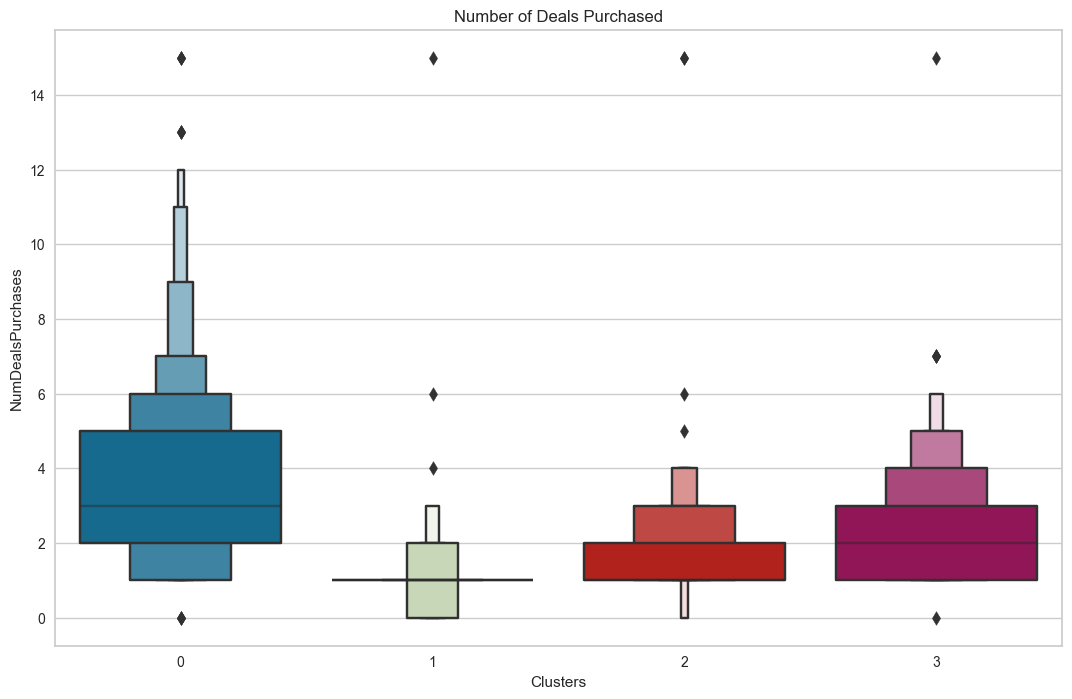

In [73]:
# The number of deals purchased
plt.figure(figsize=(13,8))
pl = sns.boxenplot(y = data_old["NumDealsPurchases"], x = data_old["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

<code style="background: #add8e6;color:black">Unlike the campaigns, we see that the deals offered yield better results. Clusters 0 and 2 have the best outcomes. However, our star customers in Cluster 1 are not very interested in the deals.</code>

<div style="background-color: #ecf0f1; padding: 10px; border-radius: 5px;">
    <b style="font-size: 20px;">Customer Profiling</b></i>
</div>

<Figure size 1300x800 with 0 Axes>

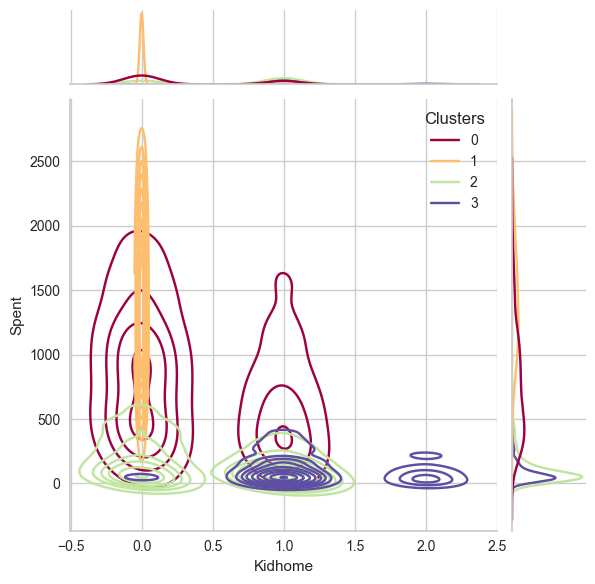

<Figure size 1300x800 with 0 Axes>

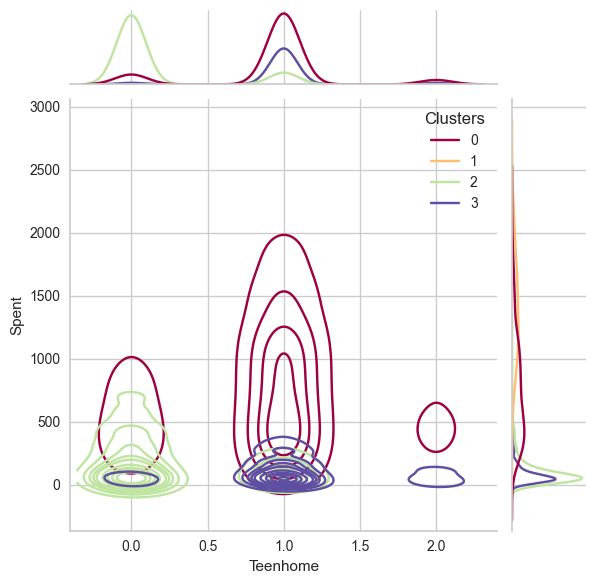

<Figure size 1300x800 with 0 Axes>

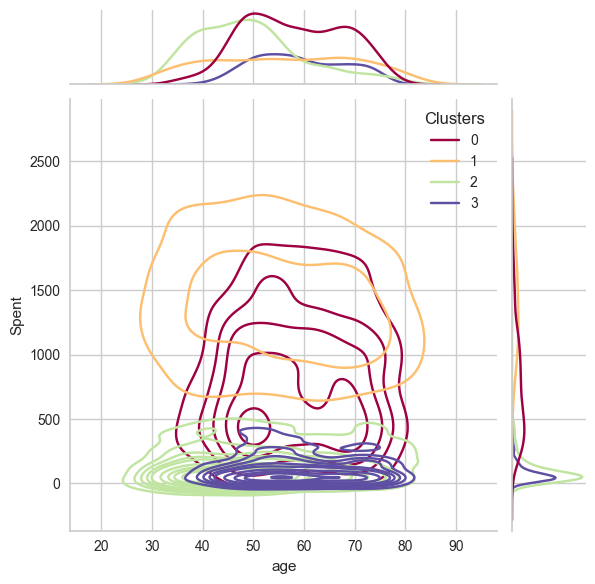

<Figure size 1300x800 with 0 Axes>

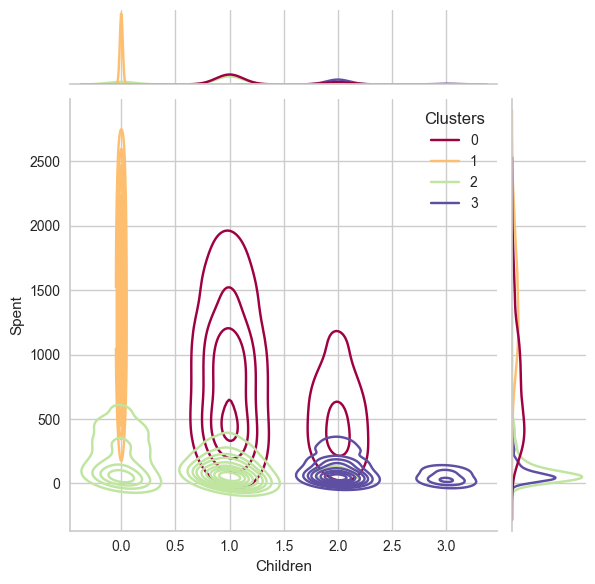

<Figure size 1300x800 with 0 Axes>

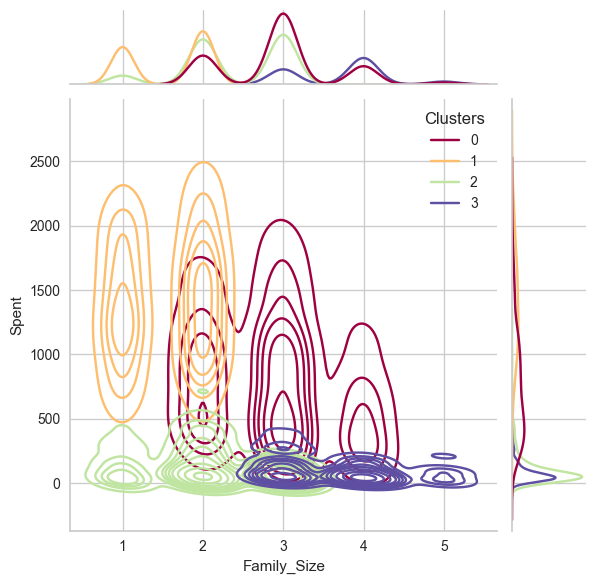

<Figure size 1300x800 with 0 Axes>

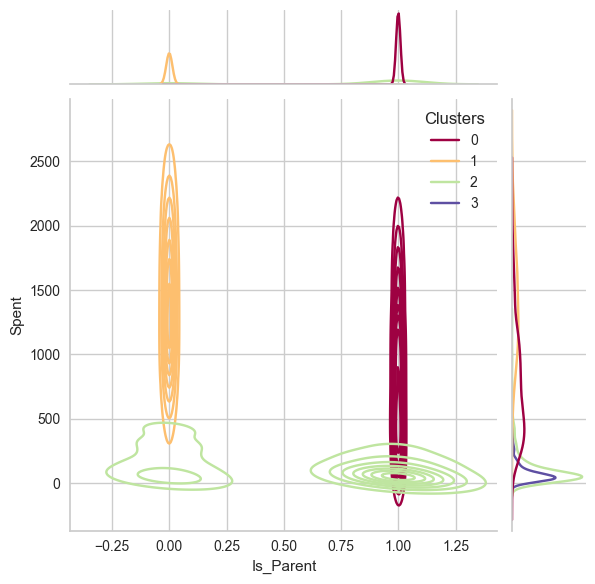

<Figure size 1300x800 with 0 Axes>

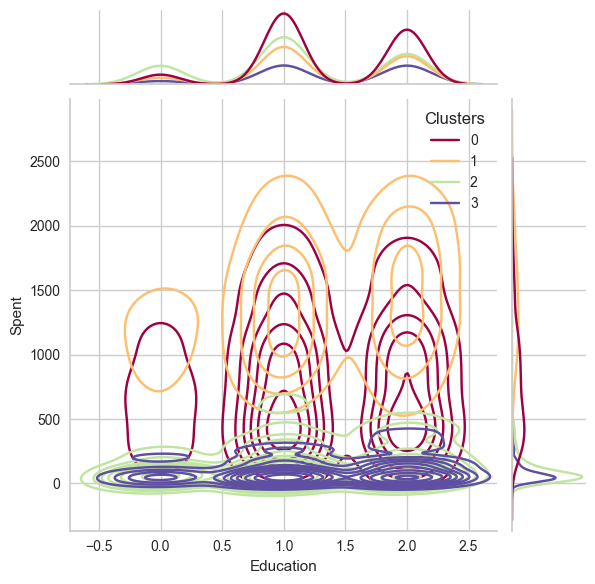

<Figure size 1300x800 with 0 Axes>

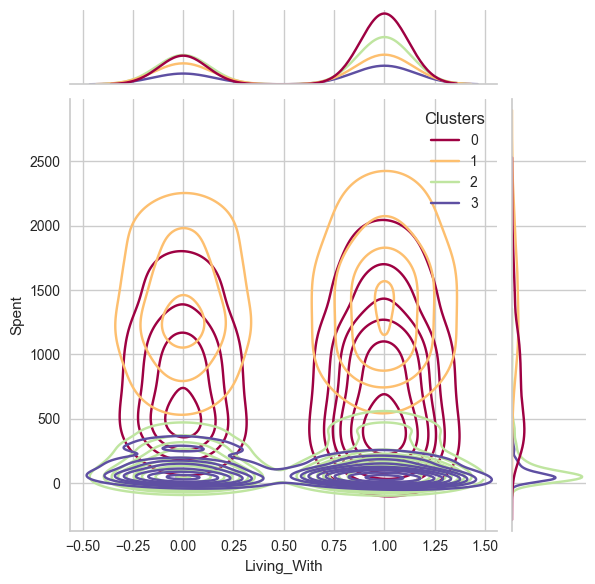

In [74]:
Personal = [ "Kidhome","Teenhome", "age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure(figsize = (13,8))
    sns.jointplot(x = data_old[i], y = data_old['Spent'], hue = data_old['Clusters'], kind = 'kde', palette='Spectral')
    plt.show()

<div style="background-color:#add8e6">
  <span style="color:black; font-weight:bold">Cluster Number: 0</span>
</div>
<ul>
  <li>They are definitely parents.</li>
  <li>Most of them have teenagers in their homes.</li>
  <li>Relatively older.</li>
  <li>They have at least 2 and maximum 4 members in their family.</li>
  <li>Single parents may be a subset of this group.</li>
</ul>

<div style="background-color:#add8e6">
  <span style="color:black; font-weight:bold">Cluster Number: 1</span>
</div>
<ul>
  <li>They are definitely not parents.</li>
  <li>Encompasses individuals of all ages.</li>
  <li>They have a maximum of two people in their families.</li>
  <li>There is a small minority of couples compared to single individuals.</li>
</ul>

<div style="background-color:#add8e6">
  <span style="color:black; font-weight:bold">Cluster Number: 2</span>
</div>
<ul>
  <li>They are definitely parents.</li>
  <li>Includes individuals of all ages.</li>
  <li>They have at least 2 and maximum 5 members in their family.</li>
</ul>

<div style="background-color:#add8e6">
  <span style="color:black; font-weight:bold">Cluster Number: 3</span>
</div>
<ul>
  <li>They are definitely not parents.</li>
  <li>Relatively younger.</li>
  <li>They have a maximum of two people in their families.</li>
</ul>
